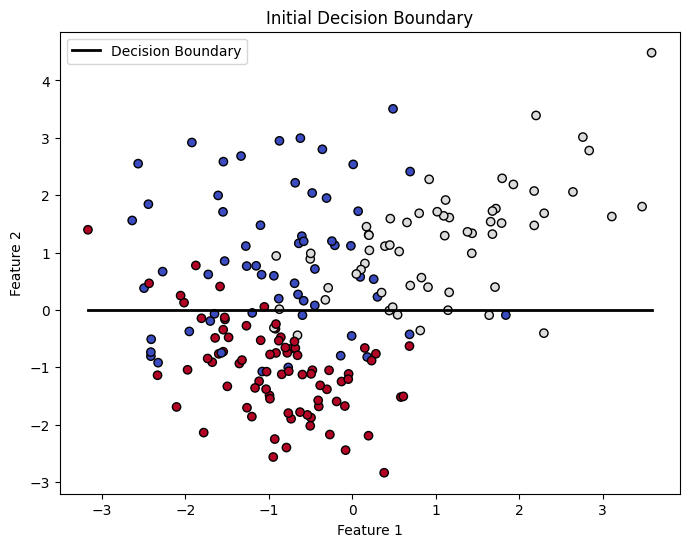

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. 数据生成
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,n_classes=2,
                           n_clusters_per_class=1, weights=[0.3,0.3,0.4], flip_y=0, random_state=42)

# 2. 初始化参数
w = np.array([0.0, 0.0])  # 初始权重向量
b = 0.0  # 初始偏置
learning_rate = 0.01  # 学习率
epochs = 1000  # 训练轮数

# 3. 定义 Sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. 定义交叉熵损失函数
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # 避免 log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 5. 手动训练逻辑回归模型（单样本更新）
def train_model(features, labels, learning_rate, epochs):
    w = np.array([0.0, 0.0])  # 初始权重向量
    b = 0.0  # 初始偏置
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        for i in range(len(features)):
            feature = features[i]
            label = labels[i]

            # 计算线性组合和预测概率
            z = np.dot(w, feature) + b
            probability = sigmoid(z)

            # 计算损失
            loss = binary_cross_entropy(np.array([label]), np.array([probability]))
            epoch_loss += loss

            # 计算梯度
            dz = probability - label  # 损失对 z 的导数
            dw = dz * feature  # 损失对 w 的导数
            db = dz  # 损失对 b 的导数
            
            # 更新参数
            w -= learning_rate * dw
            b -= learning_rate * db
        
        losses.append(epoch_loss / len(features))
    
    return w, b, losses

# 6. 可视化分类边界
def plot_decision_boundary(X, y, w, b, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolor='k')
    
    # 绘制决策边界
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    if w[1] != 0:  # 确保分母不为零
        y_values = -(w[0] * x_values + b) / w[1]
    else:
        y_values = np.zeros_like(x_values)  # 如果 w[1] == 0，说明边界是垂直的
    
    plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# 7. 训练前的初始状态
plot_decision_boundary(X, y, w, b, 'Initial Decision Boundary')

# 8. 训练模型
w_trained, b_trained, losses = train_model(X, y, learning_rate, epochs)

# 9. 训练后的状态
plot_decision_boundary(X, y, w_trained, b_trained, 'Trained Decision Boundary')

# 10. 可视化训练过程中的损失变化
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

D:\python\pytorch-learn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


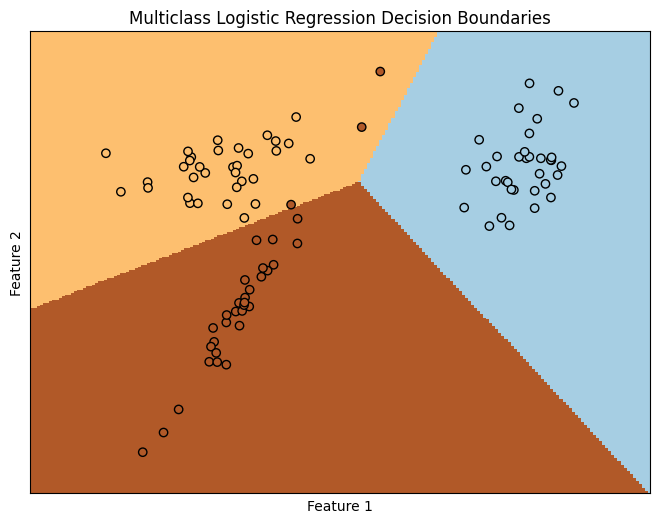

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 2: Generate a three-class classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           n_classes=3, n_clusters_per_class=1, random_state=1)

# Step 3: Split the data into training and test sets and fit the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)

# Step 4: Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Multiclass Logistic Regression Decision Boundaries')
plt.show()